In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# #fake_news = pd.read_csv('/content/drive/MyDrive/ML Portfolio/2 - Classification/5 - Naive Bayes/fake_news/Fake.csv')
# #true_news = pd.read_csv('/content/drive/MyDrive/ML Portfolio/2 - Classification/5 - Naive Bayes/fake_news/True.csv')

# # Add labels
# fake_news['label'] = 1
# true_news['label'] = 0

# # Combine
# df_raw = pd.concat([true_news, fake_news], axis=0).reset_index(drop=True)

# print("Shape:", df_raw.shape)
# df_raw.head()

In [3]:
#df_raw.to_pickle('/content/drive/MyDrive/ML Portfolio/2 - Classification/5 - Naive Bayes/fake_news/combined_raw.pkl')
#print("✅ Raw dataset saved to Drive!")


In [4]:
#df_test = pd.read_pickle('/content/drive/MyDrive/ML Portfolio/2 - Classification/5 - Naive Bayes/fake_news/combined_raw.pkl')
#print("✅ Loaded successfully:", df_test.shape)
#df_test.head()


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# path = "/content/drive/MyDrive/ML Portfolio/2 - Classification/5 - Naive Bayes/fake_news/combined_raw.pkl"

# df = pd.read_pickle(path)

# print("✅ Dataset loaded successfully!")
# print("Shape:", df.shape)
# df.head()


In [7]:
# print(df.isnull().sum())  # Missing values
# print("Duplicates:", df.duplicated().sum())

In [8]:
# df = df.drop_duplicates()
# print(df.duplicated().sum())

In [9]:
# print(df["label"].value_counts())
# print("\nColumns:", df.columns.tolist())
# df.sample(5)

In [10]:
# df["content"] = df["title"] + " " + df["text"]
# df = df[["content", "subject", "date", "label"]]
# df.head()

In [11]:
# df["text_length"] = df["content"].apply(len)
# print(df["text_length"].describe())

In [12]:
# import os

# base_path = "/content/drive/MyDrive/ML Portfolio/2 - Classification/5 - Naive Bayes/fake_news"
# os.makedirs(base_path, exist_ok=True)


In [13]:
# raw_pickle_path = os.path.join(base_path, "combined_raw.pkl")   # your existing raw pickle
# preprocessed_pickle_path = os.path.join(base_path, "combined_df.pkl")  # new preprocessed pickle


In [14]:


# if os.path.exists(preprocessed_pickle_path):
#     print("✅ Preprocessed pickle found! Loading preprocessed dataset...")
#     df = pd.read_pickle(preprocessed_pickle_path)

# else:
#     print("⚙️ Preprocessed pickle not found. Loading raw dataset and preprocessing...")

#     # Load the raw combined dataset
#     df = pd.read_pickle(raw_pickle_path)

#     # Remove duplicates
#     df = df.drop_duplicates().reset_index(drop=True)

#     # Create a unified content column (if not already done in raw)
#     if "content" not in df.columns:
#         df["content"] = df["title"] + " " + df["text"]

#     # Keep only important columns
#     df = df[["content", "subject", "date", "label"]]

#     # Save the preprocessed version for future use
#     df.to_pickle(preprocessed_pickle_path)
#     print("✅ Preprocessed pickle saved at:", preprocessed_pickle_path)

# print("Shape:", df.shape)
# df.head()


In [15]:
# !ls -lh "/content/drive/MyDrive/ML Portfolio/2 - Classification/5 - Naive Bayes/fake_news"

In [16]:
path = "/content/drive/MyDrive/ML Portfolio/2 - Classification/5 - Naive Bayes/fake_news/combined_df.pkl"

df = pd.read_pickle(path)

print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
df.head()

✅ Dataset loaded successfully!
Shape: (44898, 4)


,content,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,News,"December 25, 2017",1


#Text Preprocessing

## 1. Lowercase everything

In [17]:
df['content'] = df['content'].str.lower()
df.head(2)

,content,subject,date,label
0,donald trump sends out embarrassing new year’...,News,"December 31, 2017",1
1,drunk bragging trump staffer started russian ...,News,"December 31, 2017",1


## 2. Remove Punctuation

In [18]:
import string

# Add the apostrophe manually
punctuation = string.punctuation + "’‘"  # covers normal and smart quotes

df['content'] = df['content'].str.replace(f"[{punctuation}]", "", regex=True)
df.head(2)

,content,subject,date,label
0,donald trump sends out embarrassing new years...,News,"December 31, 2017",1
1,drunk bragging trump staffer started russian ...,News,"December 31, 2017",1


## 3. Remove extra whitespace

In [19]:
df['content'] = df['content'].str.strip()
df['content'] = df['content'].str.replace(r'\s+', ' ', regex=True)
df.head(2)

,content,subject,date,label
0,donald trump sends out embarrassing new years ...,News,"December 31, 2017",1
1,drunk bragging trump staffer started russian c...,News,"December 31, 2017",1


## Remove stopwords

In [20]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

df['content'] = df['content'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in stop_words])
)
df.head(2)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,content,subject,date,label
0,donald trump sends embarrassing new years eve ...,News,"December 31, 2017",1
1,drunk bragging trump staffer started russian c...,News,"December 31, 2017",1


## Quick check

In [21]:
df.sample(5)[['content', 'label']]

,content,label
26928,chinas media calls trumps withdrawal paris acc...,0
34134,puerto rico needs restructuring avoid cascadin...,0
16746,125000 illegal kids able avoid deportation kno...,1
14120,violent protest outside trump rally pittsburgh...,1
7913,ben carson makes bold claim hed real first bla...,1


##Training the model

In [22]:
from re import X
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

#split data
X_train, X_test, y_train, y_test = train_test_split(df['content'], df['label'], test_size=0.2, random_state=42)

#create pipeline
model = Pipeline([
    ('tfidf', TfidfVectorizer(
        max_features=5000,
        stop_words='english'
    )),
    ('nb', MultinomialNB())

])

#train model
model.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, stop_words='english')),
                ('nb', MultinomialNB())])

In [23]:
#predict
y_pred = model.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9322


In [33]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.92      0.93      4247
           1       0.93      0.94      0.94      4733

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980

[[3908  339]
 [ 270 4463]]


# Example

In [26]:
samples = [
    "Breaking: NASA confirms life found on Mars!",
    "Government announces new education policy for 2026.",
    "Scientists say drinking bleach cures COVID-19."
]

predictions = model.predict(samples)

for text, label in zip(samples, predictions):
    print(f"\n📰 {text}\n→ Predicted as: {label}")



📰 Breaking: NASA confirms life found on Mars!
→ Predicted as: 1

📰 Government announces new education policy for 2026.
→ Predicted as: 0

📰 Scientists say drinking bleach cures COVID-19.
→ Predicted as: 1


##Hyperparameter tuning

In [27]:
from sklearn.model_selection import GridSearchCV

#Define parameter grid
params = {
    'tfidf__max_features': [3000, 5000, 8000],
    'tfidf__ngram_range': [(1, 1), (1,2)],
    'nb__alpha': [0.1, 0.5, 1.0]
}

grid = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid.fit(df['content'], df['label'])

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'nb__alpha': 0.1, 'tfidf__max_features': 8000, 'tfidf__ngram_range': (1, 2)}
Best Score: 0.9152085006068355


In [28]:
best_model = grid.best_estimator_
best_model.fit(df['content'], df['label'])

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=8000, ngram_range=(1, 2),
                                 stop_words='english')),
                ('nb', MultinomialNB(alpha=0.1))])

In [34]:
y_pred_best = best_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best Model Accuracy: {accuracy_best:.4f}")
print(classification_report(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))

Best Model Accuracy: 0.9533
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4247
           1       0.96      0.96      0.96      4733

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980

[[4038  209]
 [ 210 4523]]


# Visualization

In [35]:
# Get TF-IDF and Naive Bayes objects from the pipeline
vectorizer = best_model.named_steps['tfidf']
nb = best_model.named_steps['nb']

# Get feature names
feature_names = vectorizer.get_feature_names_out()


class_real_log_probs = nb.feature_log_prob_[0]
class_fake_log_probs = nb.feature_log_prob_[1]


In [36]:
# Top 20 words for FAKE news (class 1)
top_fake_idx = np.argsort(class_fake_log_probs)[-20:]
top_fake_words = pd.DataFrame({
    'word': feature_names[top_fake_idx],
    'log_prob': class_fake_log_probs[top_fake_idx]
}).sort_values('log_prob', ascending=False)

# Top 20 words for REAL news (class 0)
top_real_idx = np.argsort(class_real_log_probs)[-20:]
top_real_words = pd.DataFrame({
    'word': feature_names[top_real_idx],
    'log_prob': class_real_log_probs[top_real_idx]
}).sort_values('log_prob', ascending=False)


/tmp/ipython-input-75801814.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='word', x='log_prob', data=top_fake_words, palette='Reds_r')
/tmp/ipython-input-75801814.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='word', x='log_prob', data=top_real_words, palette='Blues_r')


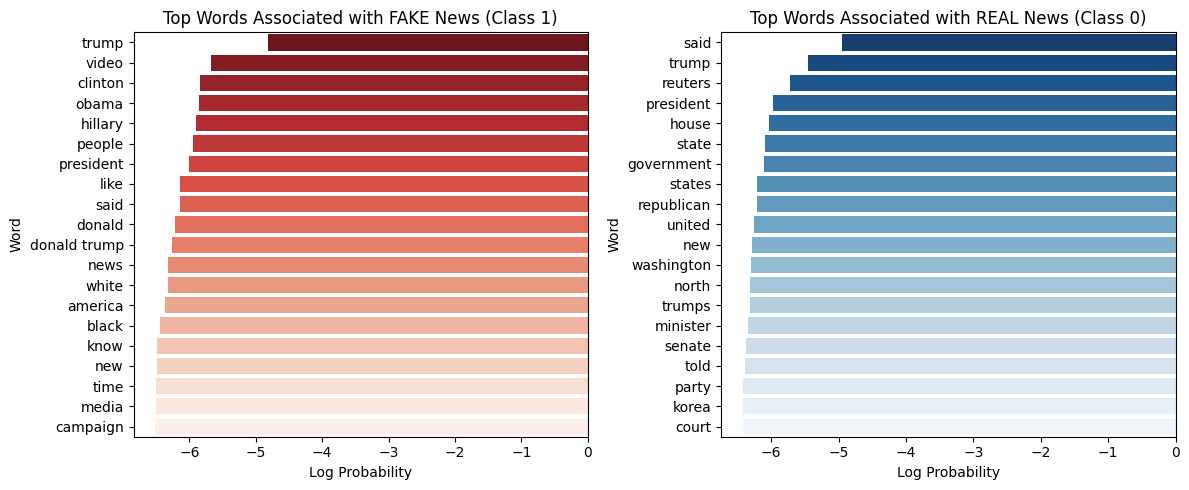

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

# FAKE News
plt.subplot(1,2,1)
sns.barplot(y='word', x='log_prob', data=top_fake_words, palette='Reds_r')
plt.title('Top Words Associated with FAKE News (Class 1)')
plt.xlabel('Log Probability')
plt.ylabel('Word')

# REAL News
plt.subplot(1,2,2)
sns.barplot(y='word', x='log_prob', data=top_real_words, palette='Blues_r')
plt.title('Top Words Associated with REAL News (Class 0)')
plt.xlabel('Log Probability')
plt.ylabel('Word')

plt.tight_layout()
plt.show()
